In [1]:
import pandas as pd
import numpy as np

In [83]:
# count = 0

# rows = []
# with open("dataset/imgs_2021070511352146227/trainset/sysmonitor_trainset.txt") as fp:
#     Lines = fp.readlines()
#     for line in Lines:
#         count += 1
#         rows.append(line.strip())
# #         print("Line{}: {}".format(count, line.strip()))
        
# print(len(rows)) 
        

In [100]:
import json

f = open('dataset/imgs_2021070511352146227/sysmonitor_train.json',)
x = json.load(f)

list_of_logs = []
list_of_time = []
count =0

for i in x.keys():
    list_of_time.append(i)
    list_of_logs.append(x[i])
    count +=1

print(len(list_of_logs))
print(len(list_of_time))




7699
7699


In [101]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
#            gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s


In [102]:
def uniq_sent(l1):
    k = []
    for i in l1:

        # If condition is used to store unique string
        # in another list 'k'
        if (l1.count(i)>=1 and (i not in k)):
            k.append(i)
    return k

In [103]:
def clean_sent(l2): # l2 is a list of sentences
    count=0
    clean_list=[]
    for i in l2:
        clean_list.append(clean_text(i))
    return clean_list

In [104]:
# Driver code
clean_uniq_list=[]
for i in list_of_logs:
    clean_uniq_list.append(uniq_sent(clean_sent(i)))
print(len(clean_uniq_list))

7699


In [106]:
zipped = list(zip(list_of_time, clean_uniq_list))
print(zipped[0])

('5381987', ['sysmonitor pkill parent getosstat send sigterm iostat bin usr bin getosstat', 'sysmonitor pkill parent getosstat send sigterm sar bin usr bin getosstat', 'sysmonitor pkill parent getosstat send sigterm pidstat bin usr bin getosstat'])


In [ ]:
for i in range(1, 2):
    print("\n\n",zipped[i])

In [ ]:
print(uniq_sent(clean_sent(list_of_logs[9])))

In [ ]:

list_of_logs[9]

In [107]:
import csv

fields=["timeStamp", "logs"]

with open('sysmonitor_train.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(zipped)

In [85]:
#logs_df = pd.read_csv('messages_train.csv')

In [86]:
logs_df.head()

,timeStamp,logs
0,5384927,['rsyslogd origin software rsyslogd swversion ...
1,5384928,"['systemd started session user root', 'systemd..."
2,5384929,"['systemd started session user cps', 'systemd ..."
3,5384930,"['systemd started session user cps', 'systemd ..."
4,5384931,"['systemd started session user cps', 'systemd ..."


In [108]:
logs_df = pd.read_csv('sysmonitor_train.csv')

In [109]:
logs_df.head()

,timeStamp,logs
0,5381987,['sysmonitor pkill parent getosstat send sigte...
1,5381990,['sysmonitor pkill parent getosstat send sigte...
2,5381992,['sysmonitor pkill parent getosstat send sigte...
3,5381994,['sysmonitor bash parent bash send sigkill bas...
4,5381996,['sysmonitor pkill parent getosstat send sigte...


In [110]:
from collections import Counter

aggregate_counter = Counter()
for row_index,row in logs_df.iterrows():
    c = Counter(row['logs'].split())
    aggregate_counter += c

common_words = [word[0] for word in aggregate_counter.most_common(20)]
common_words_counts = [word[1] for word in aggregate_counter.most_common(20)]


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot(words, words_counts, title):
    fig = plt.figure(figsize=(18,6))
    bar_plot = sns.barplot(x=words, y=words_counts)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(90)
    plt.title(title)
    plt.show()

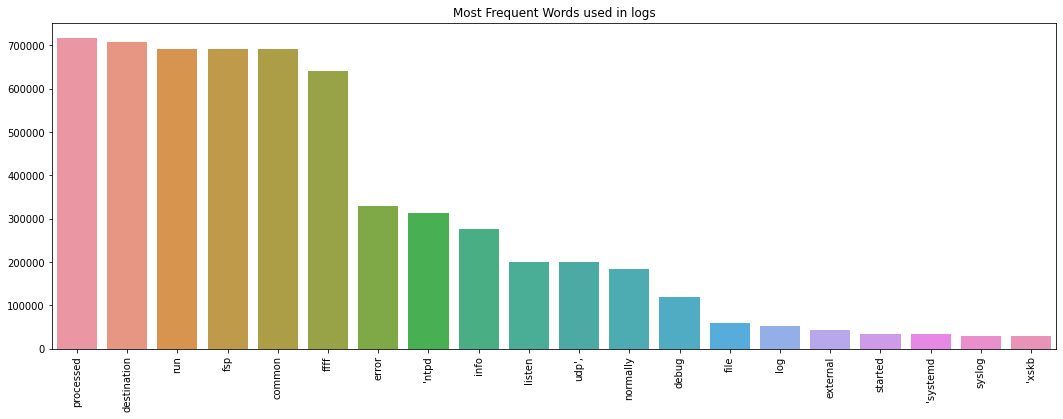

In [89]:
barplot(words=common_words, words_counts=common_words_counts, title='Most Frequent Words used in logs')

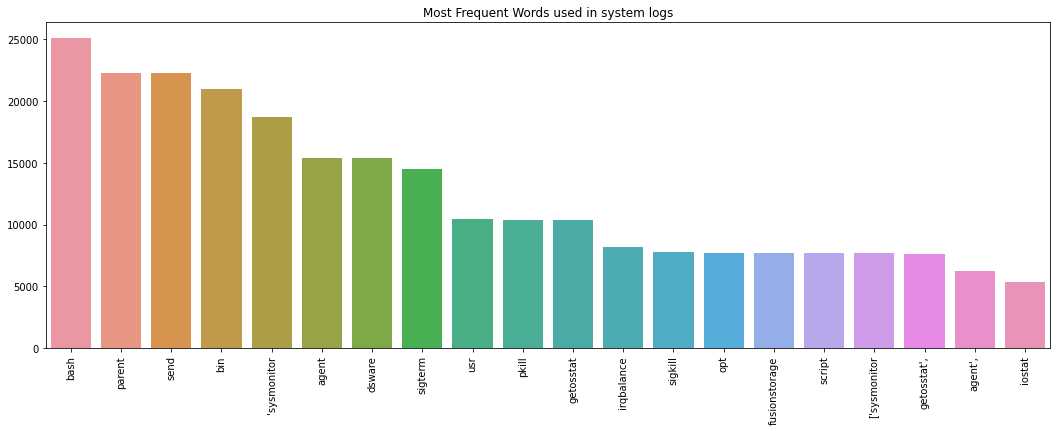

In [113]:
barplot(words=common_words, words_counts=common_words_counts, title='Most Frequent Words used in system logs')

In [115]:
# Merge the two training csv files
sys_df = pd.read_csv('dataset/imgs_2021070511352146227/trainset/sysmonitor_train.csv')
msg_df = pd.read_csv('dataset/imgs_2021070511352146227/trainset/messages_train.csv')
final_dataframe = pd.concat([sys_df, msg_df])


In [121]:
print(len(sys_df))
print(len(msg_df))
print(len(final_dataframe))


7699
14401
22100


In [118]:
# final_dataframe.to_csv('dataset/imgs_2021070511352146227/trainset/merged_train.csv')


In [140]:
# merged_df = pd.read_csv('dataset/imgs_2021070511352146227/trainset/merged_train.csv')

In [141]:
print(merged_df.head())

   Unnamed: 0  timeStamp                                               logs
0           0    5381987  ['sysmonitor pkill parent getosstat send sigte...
1           1    5381990  ['sysmonitor pkill parent getosstat send sigte...
2           2    5381992  ['sysmonitor pkill parent getosstat send sigte...
3           3    5381994  ['sysmonitor bash parent bash send sigkill bas...
4           4    5381996  ['sysmonitor pkill parent getosstat send sigte...


In [142]:
# merged_df.drop(merged_df.columns[0], axis = 1, inplace = True)

In [143]:
# merged_df.to_csv('dataset/imgs_2021070511352146227/trainset/merged_train.csv', index=False)

In [18]:
merged_df = pd.read_csv('dataset/imgs_2021070511352146227/trainset/merged_train.csv')

In [19]:
merged_df.head()

,timeStamp,logs
0,5381987,['sysmonitor pkill parent getosstat send sigte...
1,5381990,['sysmonitor pkill parent getosstat send sigte...
2,5381992,['sysmonitor pkill parent getosstat send sigte...
3,5381994,['sysmonitor bash parent bash send sigkill bas...
4,5381996,['sysmonitor pkill parent getosstat send sigte...


In [22]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.parsing.preprocessing import preprocess_string
from sklearn.base import BaseEstimator
from sklearn import utils as skl_utils
from tqdm import tqdm

import multiprocessing
import numpy as np

class Doc2VecTransformer(BaseEstimator):

    def __init__(self, vector_size=100, learning_rate=0.02, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self._model = None
        self.vector_size = vector_size
        self.workers = multiprocessing.cpu_count() - 1

    def fit(self, df_x, df_y=None):
        tagged_x = [TaggedDocument(str(row['logs']).split(), [index]) for index, row in df_x.iterrows()]
        model = Doc2Vec(documents=tagged_x, vector_size=self.vector_size, workers=self.workers)

        for epoch in range(self.epochs):
            model.train(skl_utils.shuffle([x for x in tqdm(tagged_x)]), total_examples=len(tagged_x), epochs=1)
            model.alpha -= self.learning_rate
            model.min_alpha = model.alpha

        self._model = model
        return self

    def transform(self, df_x):
        return np.asmatrix(np.array([self._model.infer_vector(str(row['logs']).split())
                                     for index, row in df_x.iterrows()]))

In [23]:
doc2vec_tr = Doc2VecTransformer(vector_size=300)
doc2vec_tr.fit(merged_df)
doc2vec_vectors = doc2vec_tr.transform(merged_df)

100%|██████████| 22100/22100 [00:00<00:00, 2062573.56it/s]


In [24]:
print(doc2vec_vectors)

[[ 1.2782742e-03 -7.2805973e-04  4.2708396e-04 ...  3.2242676e-04
  -1.5394182e-03 -2.7444979e-04]
 [-5.1566266e-04  8.2836428e-04  6.9406827e-04 ... -1.4438351e-04
   7.6033530e-04 -1.1656444e-03]
 [ 1.2782742e-03 -7.2805973e-04  4.2708396e-04 ...  3.2242676e-04
  -1.5394182e-03 -2.7444979e-04]
 ...
 [-1.5021501e-03  4.4852475e-04 -1.4256920e-03 ... -9.2206913e-04
  -2.1606813e-04 -1.3278689e-03]
 [-1.3205326e-03 -1.1997853e-03  1.4421020e-03 ...  1.1706648e-03
   9.9731411e-04  1.6205257e-03]
 [-3.1382381e-04 -1.4554487e-03  1.6126616e-03 ...  1.7316619e-04
   2.3531516e-05 -2.0554970e-04]]


In [25]:
from sklearn.neural_network import MLPRegressor

auto_encoder = MLPRegressor(hidden_layer_sizes=(
                                                 600,
                                                 150, 
                                                 600,
                                               ))
auto_encoder.fit(doc2vec_vectors, doc2vec_vectors)
predicted_vectors = auto_encoder.predict(doc2vec_vectors)

In [26]:
print(predicted_vectors)

[[ 0.01154734 -0.00092518 -0.00809791 ... -0.00534045  0.00928494
   0.00849221]
 [ 0.01159127 -0.00085769 -0.00820885 ... -0.0052627   0.00938178
   0.00855557]
 [ 0.01154734 -0.00092518 -0.00809791 ... -0.00534045  0.00928494
   0.00849221]
 ...
 [ 0.01154139 -0.00081545 -0.00819039 ... -0.00546627  0.00925885
   0.00840016]
 [ 0.01157004 -0.00083297 -0.00815288 ... -0.00527983  0.00931081
   0.00847208]
 [ 0.01155739 -0.00080322 -0.00814157 ... -0.00535443  0.00921827
   0.00855021]]


In [27]:
auto_encoder.score(predicted_vectors, doc2vec_vectors)

0.8494142672187279

<AxesSubplot:>

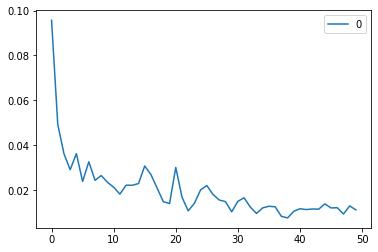

In [28]:
pd.DataFrame(auto_encoder.loss_curve_).plot()

In [ ]:
from scipy.spatial.distance import cosine

def key_consine_similarity(tupple):
    return tupple[1]

def get_computed_similarities(vectors, predicted_vectors, reverse=False):
    data_size = len(title_plot_df)
    cosine_similarities = []
    for i in range(data_size):
        cosine_sim_val = (1 - cosine(vectors[i], predicted_vectors[i]))
        cosine_similarities.append((i, cosine_sim_val))

    return sorted(cosine_similarities, key=key_consine_similarity, reverse=reverse)

def display_top_n(sorted_cosine_similarities, n=5):
    for i in range(n):
        index, consine_sim_val = sorted_cosine_similarities[i]
        print('timeStamp: ', title_plot_df.iloc[index, 0])  
        print('Cosine Sim Val :', consine_sim_val)
        print('---------------------------------')


# Preprocessing test data

In [44]:
import json

f = open('dataset/imgs_2021070511352146227/testset/sysmonitor_testset.json',)
x = json.load(f)

list_of_logs = []
list_of_time = []
count =0

for i in x.keys():
    list_of_time.append(i)
    list_of_logs.append(x[i])
    count +=1

print(len(list_of_logs))
print(len(list_of_time))




1592
1592


In [45]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
#            gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s


In [46]:
def uniq_sent(l1):
    k = []
    for i in l1:

        # If condition is used to store unique string
        # in another list 'k'
        if (l1.count(i)>=1 and (i not in k)):
            k.append(i)
    return k

In [47]:
def clean_sent(l2): # l2 is a list of sentences
    count=0
    clean_list=[]
    for i in l2:
        clean_list.append(clean_text(i))
    return clean_list

In [48]:
# Driver code
clean_uniq_list=[]
for i in list_of_logs:
    clean_uniq_list.append(uniq_sent(clean_sent(i)))
print(len(clean_uniq_list))

1592


In [49]:
zipped = list(zip(list_of_time, clean_uniq_list))
print(zipped[0])

('5396449', ['sysmonitor bash parent bash send sigkill bash bash opt fusionstorage agent script dsware agent dsware agent', 'sysmonitor bash parent bash send sigkill vmstat bash opt fusionstorage agent script dsware agent dsware agent', 'sysmonitor bash parent bash send sigkill free bash opt fusionstorage agent script dsware agent dsware agent', 'sysmonitor bash parent bash send sigkill iostat bash opt fusionstorage agent script dsware agent dsware agent'])


In [50]:
for i in range(1, 2):
    print("\n\n",zipped[i])



 ('5396450', ['sysmonitor systemd parent swapper send sigterm irqbalance', 'sysmonitor irqbalance abnormal use systemctl restart irqbalance recover ret failnum'])


In [ ]:
print(uniq_sent(clean_sent(list_of_logs[9])))

In [ ]:

list_of_logs[9]

In [51]:
import csv

fields=["timeStamp", "logs"]

with open('sysmonitor_test.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(zipped)

In [85]:
#logs_df = pd.read_csv('messages_train.csv')

In [39]:
# logs_df = pd.read_csv('messages_test.csv')

In [40]:
logs_df.head()

,timeStamp,logs
0,5399328,"['systemd started session user cps', 'systemd ..."
1,5399329,"['systemd started session user root', 'systemd..."
2,5399330,"['systemd started session user root', 'systemd..."
3,5399331,"['systemd started session user root', 'systemd..."
4,5399332,"['systemd started session user root', 'systemd..."


In [41]:
from collections import Counter

aggregate_counter = Counter()
for row_index,row in logs_df.iterrows():
    c = Counter(row['logs'].split())
    aggregate_counter += c

common_words = [word[0] for word in aggregate_counter.most_common(20)]
common_words_counts = [word[1] for word in aggregate_counter.most_common(20)]


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot(words, words_counts, title):
    fig = plt.figure(figsize=(18,6))
    bar_plot = sns.barplot(x=words, y=words_counts)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(90)
    plt.title(title)
    plt.show()

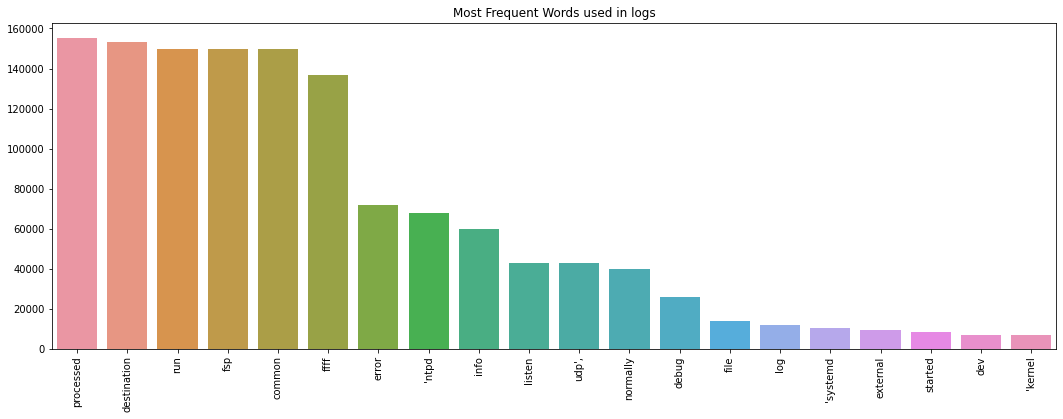

In [43]:
barplot(words=common_words, words_counts=common_words_counts, title='Most Frequent Words used in logs')

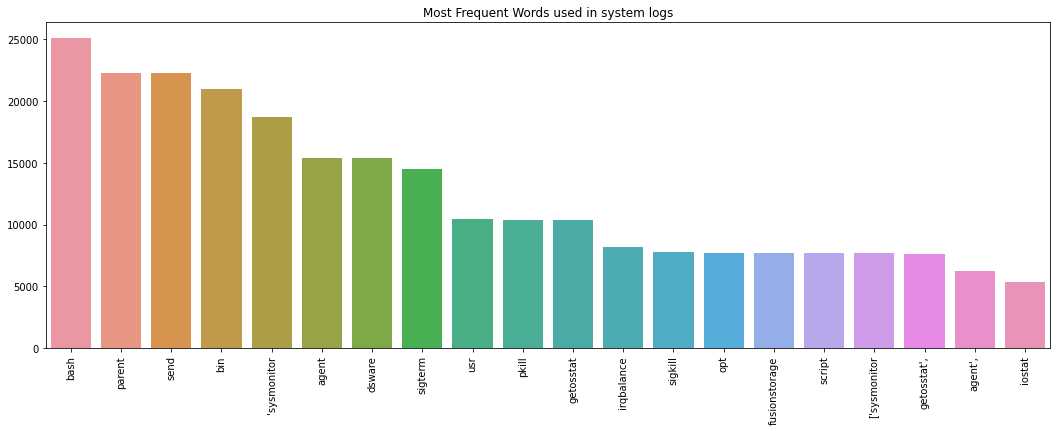

In [113]:
barplot(words=common_words, words_counts=common_words_counts, title='Most Frequent Words used in system logs')

In [67]:
# Merge the two training csv files
msg_df = pd.read_csv('dataset/imgs_2021070511352146227/testset/messages_test.csv')
sys_df = pd.read_csv('dataset/imgs_2021070511352146227/testset/sysmonitor_test.csv')
final_dataframe = pd.concat([msg_df, sys_df])


In [68]:
print(final_dataframe[10:12])

    timeStamp                                               logs
10    5399338  ['systemd started session user cps', 'systemd ...
11    5399339  ['systemd started session user cps', 'systemd ...


In [69]:
print(len(sys_df))
print(len(msg_df))
print(len(final_dataframe))


1592
3150
4742


In [70]:
final_dataframe.to_csv('dataset/imgs_2021070511352146227/testset/merged_test.csv')


In [140]:
# merged_df = pd.read_csv('dataset/imgs_2021070511352146227/trainset/merged_train.csv')

In [58]:
print(final_dataframe.head())

   timeStamp                                               logs
0    5396449  ['sysmonitor bash parent bash send sigkill bas...
1    5396450  ['sysmonitor systemd parent swapper send sigte...
2    5396453  ['sysmonitor pkill parent getosstat send sigte...
3    5396454  ['sysmonitor systemd parent swapper send sigte...
4    5396457  ['sysmonitor bash parent bash send sigkill bas...


In [142]:
# merged_df.drop(merged_df.columns[0], axis = 1, inplace = True)

In [143]:
# merged_df.to_csv('dataset/imgs_2021070511352146227/trainset/merged_train.csv', index=False)

In [59]:
merged_df = pd.read_csv('dataset/imgs_2021070511352146227/testset/merged_test.csv')

In [61]:
merged_df.head()

,Unnamed: 0,timeStamp,logs
0,0,5396449,['sysmonitor bash parent bash send sigkill bas...
1,1,5396450,['sysmonitor systemd parent swapper send sigte...
2,2,5396453,['sysmonitor pkill parent getosstat send sigte...
3,3,5396454,['sysmonitor systemd parent swapper send sigte...
4,4,5396457,['sysmonitor bash parent bash send sigkill bas...
